s1301a - 10:03 min file

s02-1 - 22 sec file

Window size is the amount of time over which a waveform is sampled, known as time record, expressed in samples. For example, a window size of 128 samples at a sample rate of 48 kHz. Equals a time record of 128 samples x 1/48000 seconds = 0.0027 seconds or 2.7 milliseconds.

Window length is the length of the fixed intervals in which STFT divides the signal. Hop length is the length of the non-intersecting portion of window length. Overlap length is the length of the intersecting portion of the window length.

In [42]:
10*60+3, 603*16000

(603, 9648000)

In [13]:
22, 22*16000

(22, 352000)

In [14]:
# !pip install librosa

In [15]:
import soundfile as sf
import os
import pyfoal
import pypar
import librosa
import torchaudio
from scipy.io import wavfile


In [16]:
# filename = './s1301a.wav'
filename = './s02-1.wav'

### Soundfile

In [17]:
data, sr = sf.read(filename)


In [18]:
data

array([3.05175781e-04, 2.44140625e-04, 9.15527344e-05, ...,
       5.49316406e-04, 4.88281250e-04, 3.96728516e-04])

In [19]:
data.shape, sr

((348026,), 16000)

### Size

In [20]:
os.path.getsize(filename) // 2

348048

### Librosa

In [21]:
data_librosa, sr = librosa.load(filename, sr=16000)

In [22]:
data_librosa.shape

(348026,)

In [23]:
data_librosa

array([3.0517578e-04, 2.4414062e-04, 9.1552734e-05, ..., 5.4931641e-04,
       4.8828125e-04, 3.9672852e-04], dtype=float32)

In [24]:
librosa.get_duration(data_librosa)

/home/pranav/conda/envs/prominence-est-conda-py37/lib/python3.7/site-packages/ipykernel_launcher.py:1: FutureWarning: Pass y=[3.0517578e-04 2.4414062e-04 9.1552734e-05 ... 5.4931641e-04 4.8828125e-04
 3.9672852e-04] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  """Entry point for launching an IPython kernel.


15.783492063492064

### Torchaudio

In [25]:
data_torch, sr = torchaudio.load(filename)

In [26]:
data_torch

tensor([[3.0518e-04, 2.4414e-04, 9.1553e-05,  ..., 5.4932e-04, 4.8828e-04,
         3.9673e-04]])

In [27]:
data_torch.shape

torch.Size([1, 348026])

### Scipy wavefile

In [28]:
sr, data_scipy = wavfile.read(filename)

In [29]:
data_scipy, data_scipy.shape

(array([10,  8,  3, ..., 18, 16, 13], dtype=int16), (348026,))

In [30]:
window_length_ms = 10

window_length = int((window_length_ms/1000)*sr)
print('Window length in samples ' + str(window_length))


Window length in samples 160


### Audio load

In [31]:
import emphases

In [32]:
audio = emphases.load.audio('../data/cache/Buckeye/wavs/s02-1.wav')

In [33]:
audio.shape, audio.shape[-1] // emphases.HOPSIZE

(torch.Size([1, 348026]), 2175)

### Mel Exp

In [43]:
from IPython.display import Audio
import librosa
import matplotlib.pyplot as plt


In [44]:
def plot_waveform(waveform, sr, title="Waveform"):
    waveform = waveform.numpy()

    num_channels, num_frames = waveform.shape
    time_axis = torch.arange(0, num_frames) / sr

    figure, axes = plt.subplots(num_channels, 1)
    axes.plot(time_axis, waveform[0], linewidth=1)
    axes.grid(True)
    figure.suptitle(title)
    plt.show(block=False)


def plot_spectrogram(specgram, title=None, ylabel="freq_bin"):
    fig, axs = plt.subplots(1, 1)
    axs.set_title(title or "Spectrogram (db)")
    axs.set_ylabel(ylabel)
    axs.set_xlabel("frame")
    im = axs.imshow(librosa.power_to_db(specgram), origin="lower", aspect="auto")
    fig.colorbar(im, ax=axs)
    plt.show(block=False)


### Custom Mel

In [45]:
import emphases
import torch

In [46]:
mel_loader = emphases.load.MelSpectrogram()


/home/pranav/prominence-estimation-exp/emphases/emphases/load.py:78: FutureWarning: Pass sr=16000, n_fft=1024, n_mels=80 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  emphases.NUM_MELS


In [47]:
audio = emphases.load.audio('../data/cache/Buckeye/wavs/s03-1.wav')
audio2 = emphases.load.audio('../data/cache/Buckeye/wavs/s11-1.wav')

In [48]:
mel_spectrogram1 = mel_loader.forward(audio)
mel_spectrogram1.shape

torch.Size([1, 80, 1352])

In [49]:
audio.shape[-1]//160

2163

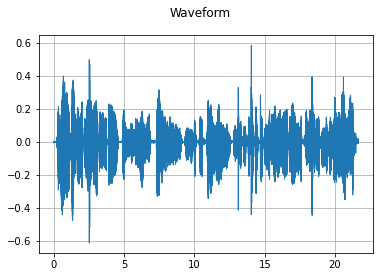

In [50]:
plot_waveform(audio, 16000)

### Torch Mel

In [51]:
import torch
import torchaudio
import torchaudio.functional as F
import torchaudio.transforms as T


In [52]:
sample_audio = torch.rand(9870)

In [53]:
# n_fft = 1024
# win_length = 1024
# hop_length = 512

# # Define transform
# spectrogram = T.Spectrogram(
#     n_fft=n_fft,
#     win_length=win_length,
#     hop_length=hop_length,
#     center=True,
#     pad_mode="reflect",
#     power=2.0,
# )


In [54]:
# spec = spectrogram(audio2)
# spec = spectrogram(sample_audio)

In [55]:
audio2.shape

torch.Size([1, 384520])

In [56]:
audio2.shape[-1]/752

511.32978723404256

In [60]:
n_fft = 1024
win_length = 1024
hop_length = 160
n_mels = 80

mel_spectrogram = T.MelSpectrogram(
    sample_rate=16000,
    n_fft=n_fft,
    win_length=win_length,
    hop_length=hop_length,
    center=False,
    pad_mode="reflect",
    power=2.0,
    norm="slaney",
    onesided=True,
    n_mels=n_mels,
    mel_scale="htk",
)

In [61]:
sample_audio.shape

torch.Size([9870])

In [62]:
# melspec = mel_spectrogram(audio2)
melspec = mel_spectrogram(sample_audio)
melspec.shape

torch.Size([80, 56])

In [63]:
(9870//160)

61

In [64]:
(9870-1024)//160

55

In [65]:
audio2.shape[-1]

384520

In [66]:
(384520)//160

2403

In [67]:
384520//2397

160

center (bool, optional) – whether to pad waveform on both sides so that the t-th frame is centered at time t×hop_length. (Default: True)


In [68]:
160*7

1120

In [69]:
melspec.shape

torch.Size([80, 56])

In [70]:
2397
2404

2404

In [74]:
audio.shape[-1]/(1352*1024)

0.25008017635909763

In [75]:
audio.shape

torch.Size([1, 346223])

In [76]:
audio[:, :494].shape

torch.Size([1, 494])

In [77]:
mel_spectrogram2 = mel_loader.forward(audio2)
mel_spectrogram2.shape

torch.Size([1, 80, 1502])

In [78]:
mel_spectrogram1.shape[-1]

1352

In [79]:
mel_spectrogram = [mel_spectrogram1, mel_spectrogram2]

In [80]:
mel_lengths = torch.tensor(
    [mel.shape[-1] for mel in mel_spectrogram], 
    dtype=torch.long)

max_mel_lengths = mel_lengths.max()

In [81]:
mel_lengths.max().item()

1502

### Checks

In [1]:
import emphases
import pypar
import os
import torch
import functools
import numpy as np
import seaborn as sns
import tqdm

In [2]:
emphases.BATCH_SIZE = 2

In [3]:
train_loader, valid_loader = emphases.data.loaders('Buckeye', 'train', 'valid', gpu=None)

In [4]:
# audio, mel_spectrogram, prominence, word_bounds = train_loader.dataset.__getitem__(0)
# train_loader.dataset.lengths
# audio.shape[-1], audio.shape[-1]//emphases.HOPSIZE

In [5]:
# np.histogram(train_loader.dataset.spectrogram_lengths)

In [6]:
# train_loader.dataset.lengths, train_loader.dataset.spectrogram_lengths
# sns.histplot(train_loader.dataset.spectrogram_lengths)

In [7]:
train_loader.batch_sampler.set_epoch(0// len(train_loader.dataset))

In [8]:
all_batches = []
for batch in train_loader:
    all_batches.append(batch)

2it [00:00, 212.04it/s]
2it [00:00, 182.25it/s]
2it [00:00, 264.03it/s]
2it [00:00, 270.77it/s]


In [9]:
batch[0].shape

torch.Size([2, 1, 292640])

In [10]:
# batch[1][11]

In [11]:
batch[1].shape

torch.Size([2, 80, 1830])

In [12]:
# batch[2][0], batch[2].shape

In [13]:
len(batch[3])

2

In [14]:
torch.is_tensor(batch[3])

True

In [15]:
# s = (item.to('cuda') if torch.is_tensor(item) else item for item in batch)
s = (item.to('cpu') if torch.is_tensor(item) else item for item in batch)

In [16]:
(padded_audio,
padded_mel_spectrogram,
padded_prominence,
padded_interpolated_prominence,
word_bounds,
word_lengths,
frame_lengths, 
interpolated_prom_lengths) = s

In [17]:
padded_mel_spectrogram.shape

torch.Size([2, 80, 1830])

In [18]:
interpolated_prom_lengths

tensor([1367, 1825])

In [19]:
padded_interpolated_prominence.shape

torch.Size([2, 1, 1825])

In [21]:
padded_interpolated_prominence[1, 0, 1300:1400]

tensor([0.3438, 0.3438, 0.3438, 0.3438, 0.3438, 0.3438, 0.3438, 0.3438, 0.3438,
        0.3438, 0.3438, 0.3438, 0.3438, 0.3438, 0.3438, 0.3438, 0.3438, 0.3438,
        0.3438, 0.3438, 0.3438, 0.3438, 0.3438, 0.5000, 0.5000, 0.5000, 0.5000,
        0.5000, 0.5000, 0.5000, 0.5000, 0.5000, 0.5000, 0.5000, 0.5000, 0.5000,
        0.5000, 0.5000, 0.5000, 0.5000, 0.5000, 0.5000, 0.5000, 0.5000, 0.5000,
        0.5000, 0.5000, 0.5000, 0.5000, 0.5000, 0.5000, 0.5000, 0.5000, 0.5000,
        0.5000, 0.5000, 0.5000, 0.5000, 0.5000, 0.5000, 0.5000, 0.5000, 0.5000,
        0.5000, 0.5000, 0.5000, 0.5000, 0.5000, 0.0312, 0.0312, 0.0312, 0.0312,
        0.0312, 0.0312, 0.0312, 0.0312, 0.0312, 0.0312, 0.0312, 0.0312, 0.0312,
        0.0312, 0.0312, 0.0312, 0.0312, 0.0312, 0.0312, 0.0312, 0.0312, 0.0312,
        0.0312, 0.0312, 0.0312, 0.0312, 0.0312, 0.0312, 0.0312, 0.0312, 0.0312,
        0.0312])

In [22]:
padded_mel_spectrogram[0, 0, 1370:1375]

tensor([0.0002, 0.0000, 0.0000, 0.0000, 0.0000])

In [23]:
len(word_bounds[0])

49

In [24]:
padded_mel_spectrogram.shape

torch.Size([2, 80, 1830])

In [25]:
model = emphases.model.BaselineModel()

model_framewise = emphases.model.FramewiseModel()
# model = emphases.model.BaselineModel(device='cuda').to('cuda')

In [26]:
# model_input = (padded_mel_spectrogram)
# model_input = (padded_audio[0:4], word_bounds[0:4], padded_prominence[0:4])

model_input = (padded_mel_spectrogram, word_bounds, padded_prominence)

model_input_framewise = padded_mel_spectrogram

In [27]:
outputs = model(model_input)

outputs_framewise = model_framewise(model_input_framewise)

In [28]:
outputs.shape

torch.Size([2, 1, 56, 1])

In [29]:
outputs_framewise.shape

torch.Size([2, 1, 1830])

In [30]:
word_lengths

tensor([49, 52])

In [31]:
padded_prominence.shape

torch.Size([2, 1, 56])

In [32]:
padded_interpolated_prominence.shape

torch.Size([2, 1, 1825])

In [34]:
vec = torch.zeros(2, 80, 64, 96)
linear = torch.nn.Linear(96, 1)
flat = torch.nn.Flatten(start_dim=2)

out = linear(vec)
out.shape

conv = torch.nn.Conv2d(80, 1, kernel_size=5, padding='same')
conv(out).shape

torch.Size([2, 1, 64, 1])

In [35]:
# linear = torch.nn.LazyLinear(1)
# linear_output = linear(output)
# linear_output.shape

# linear = torch.nn.Linear(99, 1)
# linear_output = linear(torch.zeros((2, 80, 64, 99)))
# linear_output.shape

In [36]:
# output_reshaped = output.reshape(64, 1, -1)
# output_reshaped

outputs.squeeze().shape

torch.Size([2, 56])

In [37]:
# padded_prominence.reshape(64, -1, 1).squeeze(-1).shape

In [38]:
# loss_fn = torch.nn.MSELoss()
loss_fn = torch.nn.SmoothL1Loss()


In [39]:
padded_prominence.squeeze().shape

torch.Size([2, 56])

In [40]:
loss_fn(outputs.squeeze(), padded_prominence.squeeze())

tensor(0.0294, grad_fn=<SmoothL1LossBackward0>)

In [41]:
from emphases.evaluate.metrics import cosine_sim

In [42]:
outputs_numpy = outputs.squeeze().detach().numpy()
padded_prominence_numpy = padded_prominence.squeeze().detach().numpy()

In [43]:
cosine = torch.nn.CosineSimilarity()

In [44]:
cosine(outputs.squeeze(), padded_prominence.squeeze())

tensor([0.5609, 0.6134], grad_fn=<SumBackward1>)

In [45]:
cosine_sim(outputs_numpy[1], padded_prominence_numpy[1])

0.6134058833122253

### Eval

In [36]:
# device = 'cpu'
# with torch.no_grad():
#     for batch in valid_loader:
#         (
#         padded_audio_eval,
#         padded_mel_spectrogram_eval,
#         padded_prominence_eval,
#         word_bounds_eval,
#         word_lengths_eval,
#         frame_lengths_eval
#         ) = (item.to(device) if torch.is_tensor(item) else item for item in batch)

#         # Bundle training input
#         model_input = (padded_mel_spectrogram_eval, word_bounds_eval, padded_prominence_eval)

#         valid_outputs = model(model_input)
#         valid_outputs = valid_outputs.to(device)

#         cosine = torch.nn.CosineSimilarity()
#         val_sim = cosine(valid_outputs.squeeze(), padded_prominence_eval.squeeze())

#         print('similarity values for validation set:', val_sim, '\n', 
#                 'mean similarity:', torch.mean(val_sim))


In [77]:
padded_prominence_eval.squeeze()

tensor([[0.0625, 0.0625, 0.3125, 0.0312, 0.7812, 0.5938, 0.0000, 0.0312, 0.0312,
         0.0000, 0.5000, 0.5000, 0.4688, 0.0000, 0.0625, 0.0000, 0.4062, 0.0000,
         0.2188, 0.2500, 0.5000, 0.0000, 0.0625, 0.0312, 0.0000, 0.2812, 0.2500,
         0.2188, 0.0000, 0.5312, 0.4062, 0.0000, 0.0312, 0.0312, 0.5938, 0.0000,
         0.2812, 0.1875, 0.2188, 0.0312, 0.2188, 0.1250, 0.0625, 0.0625, 0.0625,
         0.4375, 0.0000, 0.0625, 0.0000, 0.0000, 0.0000, 0.2188, 0.0625, 0.6875,
         0.0000, 0.0312],
        [0.9062, 0.0000, 0.0000, 0.0000, 0.5625, 0.0000, 0.0312, 0.7812, 0.0000,
         0.1562, 0.1875, 0.0000, 0.0000, 0.0938, 0.0312, 0.0000, 0.1250, 0.0312,
         0.5000, 0.8750, 0.3125, 0.0000, 0.0000, 0.0000, 0.0000, 0.0625, 0.0000,
         0.2812, 0.0312, 0.2500, 0.0000, 0.2812, 0.0000, 0.5312, 0.0625, 0.0312,
         0.0000, 0.2812, 0.1562, 0.0000, 0.4688, 0.1250, 0.0000, 0.0000, 0.0000,
         0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
  

In [85]:
cosine(valid_outputs.squeeze()[idx, 0:word_lengths_eval[idx]].reshape(1, -1), padded_prominence_eval.squeeze()[idx, 0:word_lengths_eval[idx]].reshape(1, -1))




tensor([0.6463])

In [90]:
device = 'cpu'
with torch.no_grad():
    for batch in valid_loader:
        (
        padded_audio_eval,
        padded_mel_spectrogram_eval,
        padded_prominence_eval,
        padded_interpolated_prominence_eval,
        word_bounds_eval,
        word_lengths_eval,
        frame_lengths_eval,
        interpolated_prom_lengths_eval
        ) = (item.to(device) if torch.is_tensor(item) else item for item in batch)
        
        # Bundle training input
        model_input_eval = (padded_mel_spectrogram_eval, word_bounds_eval, padded_prominence_eval)

        valid_outputs = model(model_input_eval)
        valid_outputs = valid_outputs.to(device)

#         cosine = torch.nn.CosineSimilarity()
#         val_sim = cosine(valid_outputs.squeeze(), padded_prominence_eval.squeeze())

#         print('>>>>> cosine similarity values for validation set:', val_sim, '\n>>>>> mean cosine similarity:', torch.mean(val_sim))
        
        cosine = torch.nn.CosineSimilarity()
        val_sim = []
        for idx in range(len(valid_outputs)):
            val_sim.append(
                cosine(
                valid_outputs.squeeze()[idx, 0:word_lengths_eval[idx]].reshape(1, -1), 
                padded_prominence_eval.squeeze()[idx, 0:word_lengths_eval[idx]].reshape(1, -1)
                )
                )

        print('>>>>> cosine similarity values for validation set:', val_sim, '\n>>>>> mean cosine similarity:', torch.tensor(val_sim).mean())

        losses = 0
        for idx in range(len(valid_outputs)):
            # masking the loss
            # print(padded_prominence, valid_outputs, word_lengths, idx)

            losses += loss_fn(
                valid_outputs.squeeze()[idx, 0:word_lengths_eval[idx]], 
                padded_prominence_eval.squeeze()[idx, 0:word_lengths_eval[idx]]
                )



2it [00:00, 231.03it/s]


>>>>> cosine similarity values for validation set: [tensor([0.6463]), tensor([0.5665])] 
>>>>> mean cosine similarity: tensor(0.6064)


### Loss per sample

In [190]:
losses = 0
for idx in range(len(outputs)):
    # clipping the ground truth vectors and output vectors to available words per sample
    losses += loss_fn(
        outputs.squeeze()[idx, 0:word_lengths[idx]], 
        padded_prominence.squeeze()[idx, 0:word_lengths[idx]]
        )

In [191]:
losses

tensor(0.0532, grad_fn=<AddBackward0>)

### Slice the inputs wrt word bounds

Process the word bounds, split the torch tensor into chunks and then pass further into the network, grad true

In [193]:
word_lengths

tensor([49, 52])

In [194]:
padded_prominence[0]

tensor([[0.5938, 0.0000, 0.1875, 0.0625, 0.0312, 0.5625, 0.0000, 0.0000, 0.0312,
         0.0625, 0.0000, 0.0000, 0.0000, 0.5312, 0.0312, 0.0312, 0.1875, 0.0000,
         0.0312, 0.2812, 0.0000, 0.2500, 0.0000, 0.0000, 0.0312, 0.0312, 0.5938,
         0.4375, 0.0000, 0.0938, 0.0000, 0.0000, 0.0938, 0.0000, 0.1562, 0.1250,
         0.0312, 0.3750, 0.0000, 0.0625, 0.6562, 0.0000, 0.2500, 0.5938, 0.0000,
         0.2812, 0.0312, 0.3438, 0.6875, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
         0.0000, 0.0000]])

In [195]:
# word_bounds[0][1][0]*emphases.HOPSIZE, word_bounds[0][1][1]*emphases.HOPSIZE

In [196]:
(1376-1424)*emphases.HOPSIZE

-7680

In [197]:
frame_lengths[0]

tensor(1370)

In [198]:
word_bounds[0]

[(9, 32),
 (32, 44),
 (44, 64),
 (64, 74),
 (74, 94),
 (94, 150),
 (150, 169),
 (169, 179),
 (179, 201),
 (201, 215),
 (215, 220),
 (220, 236),
 (236, 260),
 (260, 301),
 (301, 333),
 (380, 398),
 (398, 456),
 (456, 474),
 (474, 498),
 (498, 539),
 (539, 556),
 (556, 615),
 (615, 627),
 (627, 636),
 (636, 658),
 (658, 662),
 (704, 731),
 (731, 767),
 (767, 778),
 (778, 802),
 (802, 834),
 (834, 846),
 (846, 876),
 (876, 888),
 (888, 918),
 (918, 943),
 (943, 957),
 (957, 981),
 (981, 994),
 (994, 1000),
 (1000, 1040),
 (1040, 1047),
 (1047, 1112),
 (1112, 1169),
 (1169, 1178),
 (1216, 1269),
 (1269, 1283),
 (1283, 1318),
 (1318, 1367)]

In [199]:
padded_mel_spectrogram[0][0][0:1430]

tensor([3.8642e-05, 4.3528e-05, 3.3849e-05,  ..., 0.0000e+00, 0.0000e+00,
        0.0000e+00])

In [200]:
# input_features = padded_audio[1, :, :][0]
# wb = word_bounds[1]

In [201]:
# def get_slices(input_features, wb):
#     """
#     Generate framewise slices as per word bounds
#     return a padded tensor for given input_features

#     """
#     duration_slices = []
#     for bound in wb:
#         # dur = (bound[1] - bound[0])*emphases.HOPSIZE # for audio inputs
#         dur = (bound[1] - bound[0]) # for mel spectro inputs
#         duration_slices.append(dur)

#     extra_noise = False

#     if sum(duration_slices)!=input_features.shape[-1]:
#         extra_noise = True
#         duration_slices.append(input_features.shape[-1] - sum(duration_slices))

#     slices = torch.split(input_features, duration_slices)

#     if extra_noise:
#         # get rid of the extra noise duration
#         duration_slices = duration_slices[:-1]
#         slices = slices[:-1]

#     padded_features = torch.zeros(
#             (1, len(duration_slices), max(duration_slices)))

#     for idx, sl in enumerate(slices):
#         padded_features[:, idx, :len(sl)] = sl

#     feat_len = padded_features.shape[-1]

#     return padded_features, feat_len


In [286]:
def get_slices_spectro_channels(input_features_channels, wb):
    """
    Generate framewise slices as per word bounds
    return a padded tensor for given input_features

    """
    duration_slices = []

    for bound in wb:
        # dur = (bound[1] - bound[0])*emphases.HOPSIZE # for audio inputs
        dur = (bound[1] - bound[0]) # for mel spectro inputs
        duration_slices.append(dur)

    extra_noise = False

    if sum(duration_slices)!=input_features_channels.shape[-1]:
        extra_noise = True
        duration_slices.append(input_features_channels.shape[-1] - sum(duration_slices))

    # if extra_noise:
        # padded_features = torch.zeros(
        #         (len(input_features_channels), len(duration_slices[:-1]), max(duration_slices[:-1])))

    # else:
        # padded_features = torch.zeros(
        #         (len(input_features_channels), len(duration_slices), max(duration_slices)))
        
    padded_features = torch.zeros(
            (len(input_features_channels), emphases.MAX_NUM_OF_WORDS, emphases.MAX_WORD_DURATION))
        

    for channel_idx, input_features in enumerate(input_features_channels):

        slices = torch.split(input_features, duration_slices)

        if extra_noise:
            slices = slices[:-1]

        for idx, sl in enumerate(slices[:emphases.MAX_NUM_OF_WORDS]):

            if len(sl)<=emphases.MAX_WORD_DURATION:
                padded_features[channel_idx, idx, :len(sl)] = sl[:emphases.MAX_WORD_DURATION]

            else:
                padded_features[channel_idx, idx, :emphases.MAX_WORD_DURATION] = sl[:emphases.MAX_WORD_DURATION]

    return padded_features, padded_features.shape[-1]


In [287]:
emphases.MAX_NUM_OF_WORDS, emphases.MAX_WORD_DURATION = 64, 96

In [305]:
def temp(input_features_channels, wb):
    duration_slices = []

    for bound in wb:
        # dur = (bound[1] - bound[0])*emphases.HOPSIZE # for audio inputs
        dur = (bound[1] - bound[0]) # for mel spectro inputs
        duration_slices.append(dur)

    extra_noise = False

    if sum(duration_slices)!=input_features_channels.shape[-1]:
        extra_noise = True
        duration_slices.append(input_features_channels.shape[-1] - sum(duration_slices))

    if extra_noise:
        padded_features = torch.zeros(
                (len(input_features_channels), len(duration_slices[:-1]), emphases.MAX_WORD_DURATION))

    #     padded_features = torch.zeros(
    #             (len(input_features_channels), emphases.MAX_NUM_OF_WORDS, emphases.MAX_WORD_DURATION))
    else:
        padded_features = torch.zeros(
                (len(input_features_channels), len(duration_slices), emphases.MAX_WORD_DURATION))
    #     padded_features = torch.zeros(
    #             (len(input_features_channels), emphases.MAX_NUM_OF_WORDS, emphases.MAX_WORD_DURATION))

    for channel_idx, input_features in enumerate(input_features_channels):

        slices = torch.split(input_features, duration_slices)

        if extra_noise:
            slices = slices[:-1]

        for idx, sl in enumerate(slices):

            if len(sl)<=emphases.MAX_WORD_DURATION:
                padded_features[channel_idx, idx, :len(sl)] = sl[:emphases.MAX_WORD_DURATION]

            else:
                padded_features[channel_idx, idx, :emphases.MAX_WORD_DURATION] = sl[:emphases.MAX_WORD_DURATION]
    return padded_features, padded_features.shape[-1]

In [306]:
input_features_channels.shape

torch.Size([80, 1830])

In [307]:
torch.split(input_features, duration_slices)

(tensor([4.5897e-07, 3.0385e-07, 9.3541e-08, 3.5620e-08, 2.4244e-08, 2.7282e-08,
         3.4638e-08, 3.2626e-08, 3.0356e-08, 3.6985e-08, 4.3889e-08, 6.0753e-08,
         1.0595e-07, 1.7636e-07, 2.3484e-07, 3.2549e-07, 4.9561e-07, 5.5244e-07,
         4.3493e-07, 3.3783e-07, 3.0608e-07, 2.9839e-07, 3.6899e-07]),
 tensor([4.2301e-07, 4.8168e-07, 9.6200e-07, 1.6958e-06, 1.9030e-06, 1.5162e-06,
         1.0018e-06, 5.7999e-07, 2.9254e-07, 1.5839e-07, 1.6590e-07, 4.2603e-07]),
 tensor([8.5473e-07, 9.1436e-07, 5.8354e-07, 4.2786e-07, 5.5613e-07, 5.2673e-07,
         2.3672e-07, 4.4370e-08, 1.2861e-08, 1.1623e-08, 1.1741e-08, 2.8170e-08,
         4.2891e-07, 1.8711e-06, 4.2655e-06, 8.5143e-06, 1.1772e-05, 9.8230e-06,
         6.0230e-06, 4.1689e-06]),
 tensor([3.8809e-06, 4.5726e-06, 4.1688e-06, 3.1178e-06, 2.8415e-06, 1.9968e-06,
         6.7901e-07, 1.4809e-07, 1.1849e-07, 1.5050e-07]),
 tensor([1.6533e-07, 1.4158e-07, 1.1711e-07, 9.7300e-08, 6.5521e-08, 3.5699e-08,
         2.2482e-08, 1.

In [ ]:
padded_features.shape

In [309]:
# padded_features.shape

In [310]:
input_features_channels = padded_mel_spectrogram[0]
wb = word_bounds[0]

In [311]:
padded_mel_spectrogram[1].shape

torch.Size([80, 1830])

In [312]:
batch_size = 2

# f1, f1_len = get_slices_spectro_channels(padded_mel_spectrogram[0], word_bounds[0])
# f2, f2_len = get_slices_spectro_channels(padded_mel_spectrogram[1], word_bounds[1])

f1, f1_len = temp(padded_mel_spectrogram[0], word_bounds[0])
f2, f2_len = temp(padded_mel_spectrogram[1], word_bounds[1])

f1.shape
f2.shape

f_lens = [f1_len, f2_len]
f = [f1, f2]

max_flen = max(f_lens)

padded_features_2 = torch.zeros((batch_size, padded_mel_spectrogram.shape[1], 
                                 emphases.MAX_NUM_OF_WORDS, emphases.MAX_WORD_DURATION))

for idx, (f_len, f_item) in enumerate(zip(f_lens, f)):
    padded_features_2[idx, :, :f_item.shape[1], :f_item.shape[-1]] = f_item[:]


In [314]:
f2.shape

torch.Size([80, 52, 96])

In [316]:
padded_features_2.shape

torch.Size([2, 80, 64, 96])

In [297]:
padded_features_2.shape

torch.Size([2, 80, 64, 96])

In [214]:
# padded_features_2.shape

In [215]:
# padded_audio.shape

In [216]:
# padded_audio[0, :, :][0].shape, input_features.reshape(-1).shape

In [217]:
feat_lens = []
feats = []
for idx, (input_features, wb) in enumerate(zip(padded_mel_spectrogram, word_bounds)):
    feat, feat_length = get_slices_spectro_channels(input_features, wb)
    feats.append(feat)
    feat_lens.append(feat_length)

In [218]:
feats[0].shape

torch.Size([80, 64, 96])

In [219]:
max_flen = max(feat_lens)

padded_features_2 = torch.zeros((emphases.BATCH_SIZE, padded_mel_spectrogram.shape[1], 
                                 emphases.MAX_NUM_OF_WORDS, emphases.MAX_WORD_DURATION))

for idx, (f_len, f_item) in enumerate(zip(feat_lens, feats)):
    padded_features_2[idx, :, :f_item.shape[1], :f_item.shape[-1]] = f_item[:]


In [220]:
f_item.shape

torch.Size([80, 64, 96])

In [221]:
padded_features_2.shape

torch.Size([2, 80, 64, 96])